In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [23]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [24]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Text(0.5, 1.0, 'Home Price (CAD) vs Area (sq. ft)')

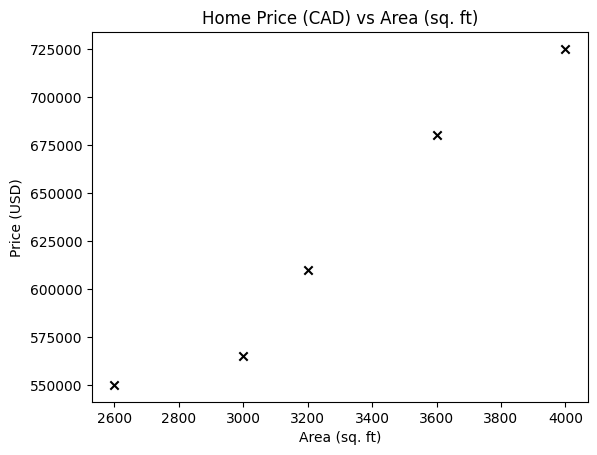

In [25]:
%matplotlib inline
plt.scatter(df.area, df.price, color='black', marker='x')
plt.xlabel('Area (sq. ft)')
plt.ylabel('Price (USD)')
plt.title('Home Price (CAD) vs Area (sq. ft)')
#plt.plot(df.area, reg.predict(df[['area']]), color='red')

In [26]:
predData = pd.DataFrame({'area': [3300]})
pred = reg.predict(predData)
rounded = round(pred[0], 2)
print(rounded)

628715.75


In [27]:
print(reg.coef_)
print(reg.intercept_)
print(f"{(reg.coef_[0] * 3300 + reg.intercept_)} <--- Same as above, not rounded")

[135.78767123]
180616.43835616432
628715.7534246575 <--- Same as above, not rounded


In [28]:
df2 = pd.read_csv('areas.csv')
df2

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [29]:
predList = reg.predict(df2)

In [30]:
df2Result = pd.read_csv('areas.csv')
df2Result['price'] = predList
df2Result

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [31]:
df2Result.to_csv('predictions.csv', index=False)

Text(0, 0.5, 'Price (USD)')

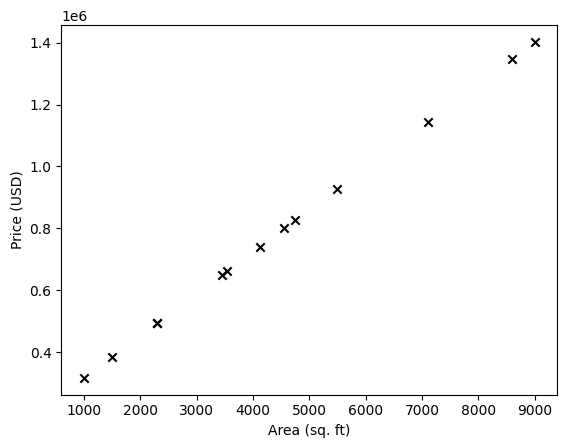

In [32]:
%matplotlib inline
allPredicts = pd.read_csv('predictions.csv')
plt.scatter(allPredicts.area, allPredicts.price, color='black', marker='x')
plt.xlabel('Area (sq. ft)')
plt.ylabel('Price (USD)')

In [33]:
import pickle

In [34]:
with open('model.pkl', 'wb') as f:
    pickle.dump(reg, f)

In [35]:
with open('model.pkl', 'rb') as f:
    newModel = pickle.load(f)


In [36]:
newModel.predict([[8000]])

C:\Users\TheAn\PycharmProjects\ML-AI-Practice\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1266917.80821918])

In [37]:
import joblib

In [38]:
#Faster for scientific models w/ pandas dataframes and numpy arrays, lowkey easier
joblib.dump(reg, 'joblibModel.joblib')
newJoblibModel = joblib.load('joblibModel.joblib')
newJoblibModel.predict([[8000]])

C:\Users\TheAn\PycharmProjects\ML-AI-Practice\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1266917.80821918])